In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
#based on https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
imported_data = pd.read_csv('ProtFam_Dist_Codes.csv')
print(imported_data.shape)
imported_data.head()

(28258, 100)


,Prot Family Size,Stauroneis_constricta__Strain_CCMP1120,Craspedostauros_australis__Strain_CCMP3328,Cylindrotheca_closterium,Nitzschia_punctata__Strain_CCMP561,Fragilariopsis_kerguelensis__Strain_L2-C3,Fragilariopsis_kerguelensis_L26_C5,Pseudo-nitzschia_australis__Strain_10249_10_AB,Pseudo-nitzschia_pungens,Pseudo-nitzschia_pungens_cf._cingulata,...,Guinardia_sp.,Aulacoseira_subarctica__Strain_CCAP_1002,Stephanopyxis_turris__Strain_CCMP_815,Proboscia_inermis,Proboscia_alata__Strain_PI-D3,Leptocylindrus_danicus_var._apora_B651,Leptocylindrus_danicus_var._danicus_B650,Leptocylindrus_danicus_CCMP1856,Corethron_hystrix,Corethron_pennatum__Strain_L29A3
0,16779,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10304,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8804,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import scipy.cluster.hierarchy as shc

data = imported_data.iloc[:,1:]
strains = data.T

matrix = shc.linkage(strains, method='ward')
#dend = shc.dendrogram(matrix) #basic tree


In [4]:
strains.head()

,0,1,2,3,4,5,6,7,8,9,...,28248,28249,28250,28251,28252,28253,28254,28255,28256,28257
Stauroneis_constricta__Strain_CCMP1120,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Craspedostauros_australis__Strain_CCMP3328,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Cylindrotheca_closterium,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Nitzschia_punctata__Strain_CCMP561,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Fragilariopsis_kerguelensis__Strain_L2-C3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [55]:
strains_translate = {}
for i,v in enumerate(list(strains.index)):
    strains_translate[i] = v

In [23]:
#print(dir(matrix))
print(shc.leaves_list(matrix))

[64 58 59 55 57 63 61 56 60 62 65 79 80 76 77 78 71 72 73 75 74 66 70 67
 68 69  4  5  9  6  7  8 10 11 12 13 82 83 84 85 86 52 53 51 48 49 50 45
 38 40 44 41 43 42 46 94 95 96 88 89 47 90 87 91 92 93 97 98 17  0  1 54
 81 18 26 39  2  3 14 15 21 22 25 27 28 23 24 32 30 31 29 36 19 20 34 35
 37 16 33]


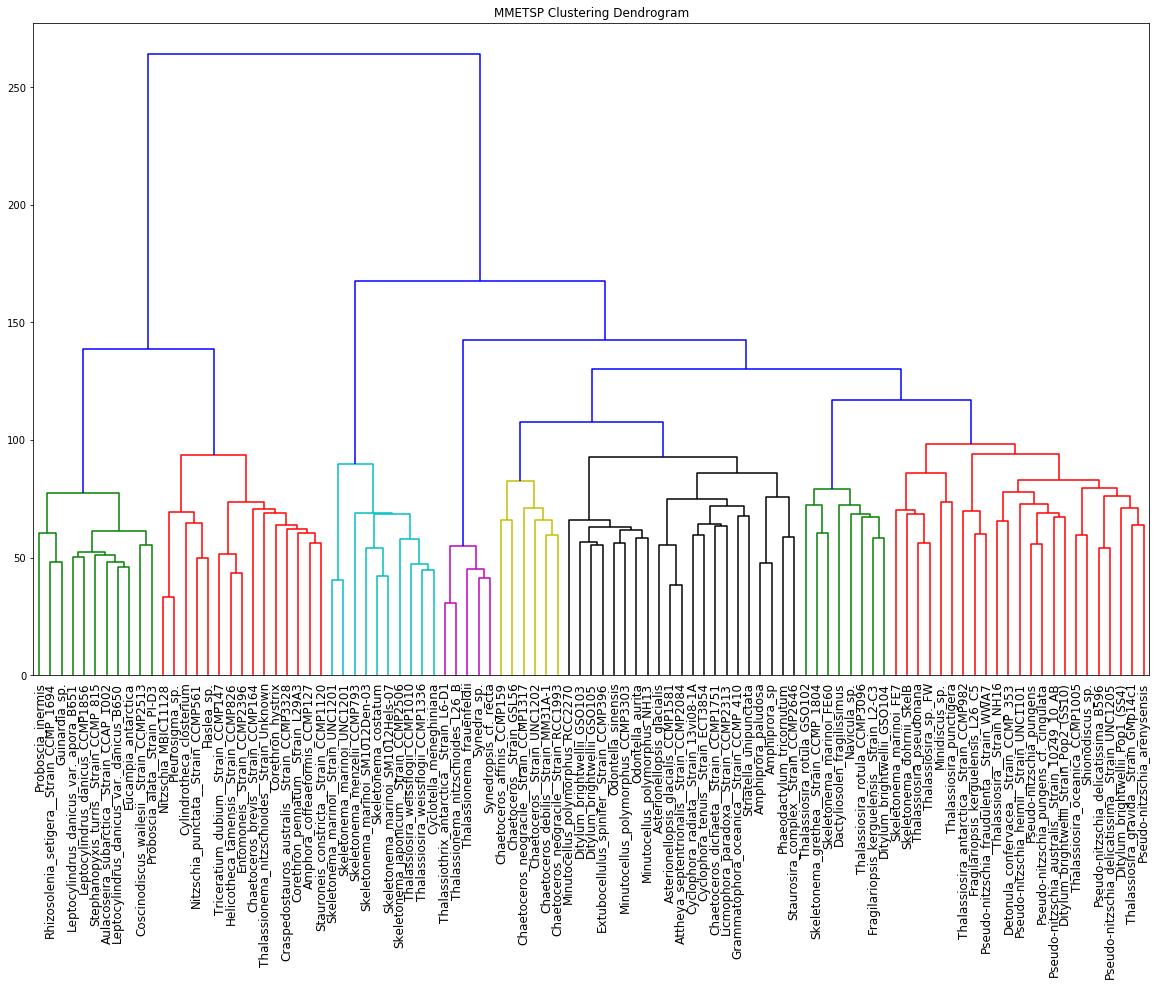

In [60]:
fig, ax1 = plt.subplots(1,1, sharey=False, figsize=(20,12))
strains_t = [strains_translate[x] for x in shc.leaves_list(matrix)]
plt.title("MMETSP Clustering Dendrogram")
dend = shc.dendrogram(matrix, color_threshold=100, no_labels=False, labels=strains_t, \
                      orientation='top', leaf_font_size=12, get_leaves=False)
plt.show()

In [61]:
def getNewick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick

leaf_names = shc.leaves_list(matrix) #list of leaf node ids as they appear left to right
strains_t = [strains_translate[x] for x in shc.leaves_list(matrix)] #translated into human language
tree = shc.to_tree(matrix,False)
getNewick(tree, "", tree.dist, strains_t)

'((((((((((((Pseudo-nitzschia_arenysensis:63.86,Thalassiosira_gravida__Strain_GMp14c1:63.86):7.37,Ditylum_brightwellii_Pop1_(SS4):71.23):4.93,(Pseudo-nitzschia_delicatissima__Strain_UNC1205:54.30,Pseudo-nitzschia_delicatissima_B596:54.30):21.86):3.61,(Shionodiscus_sp.:59.63,Thalassiosira_oceanica_CCMP1005:59.63):20.13):3.25,((((Ditylum_brightwellii_Strain_Pop2_(SS10):67.39,Pseudo-nitzschia_australis__Strain_10249_10_AB:67.39):1.70,(Pseudo-nitzschia_pungens_cf._cingulata:55.99,Pseudo-nitzschia_pungens:55.99):13.11):3.60,Pseudo-nitzschia_heimii__Strain_UNC1101:72.69):5.20,(Detonula_confervacea__Strain_CCMP_353:65.73,Thalassiosira__Strain_NH16:65.73):12.17):5.12):11.09,((Pseudo-nitzschia_fraudulenta__Strain_WWA7:59.87,Fragilariopsis_kerguelensis_L26_C5:59.87):10.11,Thalassiosira_antarctica__Strain_CCMP982:69.98):24.12):4.25,((Thalassiosira_punctigera:73.88,Minidiscus_sp.:73.88):12.28,(((Thalassiosira_sp._FW:56.23,Thalassiosira_pseudonana:56.23):12.16,Skeletonema_dohrnii_SkelB:68.40):2.02,

In [31]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([1, 1, 1, ..., 2, 2, 2])